## 2D Random-walker
- Find Diffusivity from mean squared displacement vs number of jumps
- Find probability of being at distance $d$ after $i$ jumps

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
njumps = 100
nexperiments = 4000 # higher the number of experiments, better the average
x, y = np.zeros(njumps), np.zeros(njumps)

### Random walker function

In [3]:
def random_walk(x, y):
    random_number = np.random.random() # generates random number between 0 and 1
    if random_number < 0.25:
        x, y = x-1, y # turn left
    elif random_number < 0.5:
        x, y = x+1, y # turn right
    elif random_number < 0.75:
        x, y = x, y+1 # turn up
    else:
        x, y = x, y-1 # turn down
    return x, y

### Start experiments
Let $N = $ no of experiments. For $i^{th}$ jump,
$$ d_i^2 = x_i^2 + y_i^2 $$

$$ {d_i^2}_{sum} = \sum^{N} d_i^2 $$

$$ msd_i = \frac{{d_i^2}_{sum}}{N} $$

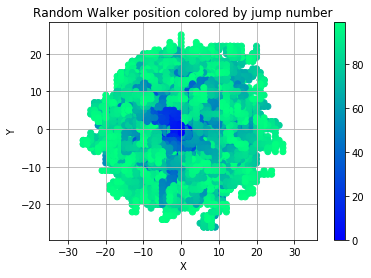

In [4]:
jump_array = np.arange(0, njumps)
data = np.zeros((nexperiments, njumps))
distance_sqr_sum = np.zeros(njumps)
for experiment in range(nexperiments):
    x[0], y[0] = 0, 0 # start each experiment from centre
    for i in range(njumps-1):
        x[i+1], y[i+1] = random_walk( x[i], y[i] )
        distance_sqr = x[i+1]**2 + y[i+1]**2
        distance_sqr_sum[i+1] += distance_sqr # summing over all experiments
        data[experiment, i+1] = np.sqrt(distance_sqr)
    plt.scatter(x, y, c=jump_array, cmap='winter') # coloring by jump number, cmap='cool'
#     plt.plot(x, y) # cool
        
msd_i = distance_sqr_sum/nexperiments # average over all experiments, this gives the mean square displacement
plt.axis('equal')
plt.grid()
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Walker position colored by jump number')
plt.show()

### Plot MSD vs jumps

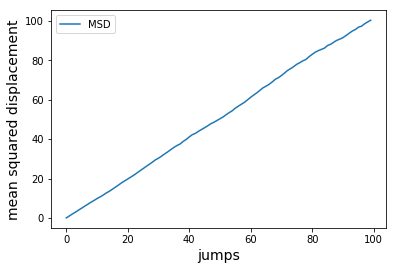

In [5]:
plt.plot(msd_i, label='MSD')
plt.xlabel('jumps', size=14)
plt.ylabel('mean squared displacement', size=14)
plt.legend()
plt.show()

### Plot histogram of position at $i^{th}$ jump

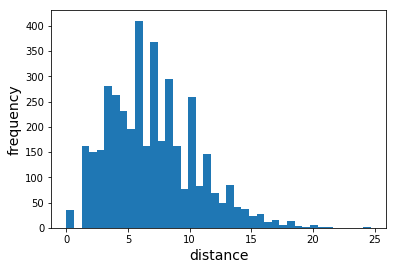

In [6]:
jump_no = 60
hist_jump_i = plt.hist(data[:, jump_no], bins=40)
plt.xlabel('distance', size=14)
plt.ylabel('frequency', size=14)
plt.show()